In [3]:
import numpy as np #For Linear Algebra
import pandas as pd # For processing of data, CSV file I/O
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()

In [4]:
df_test= pd.read_csv('test.csv')
df_train= pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.drop(['Cabin'],inplace=True,axis=1)

In [9]:
df_train['Age'].replace(np.NaN,df_train['Age'].mean()).head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
df_train.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


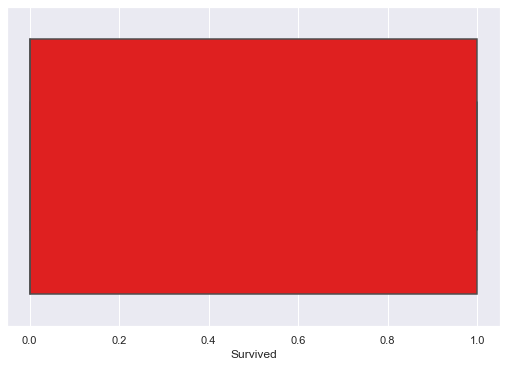

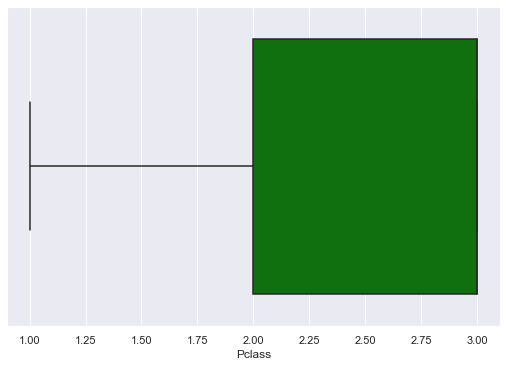

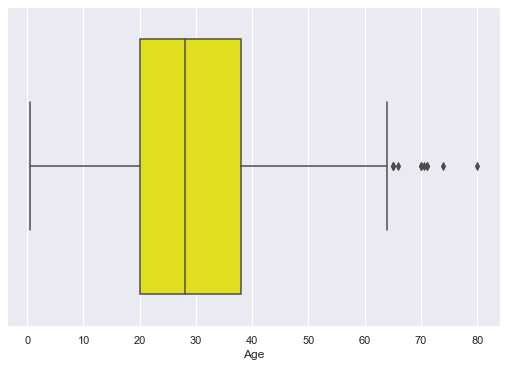

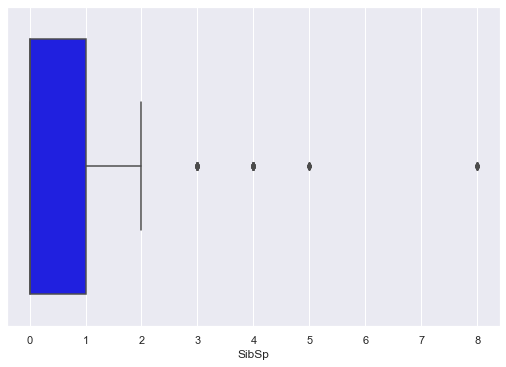

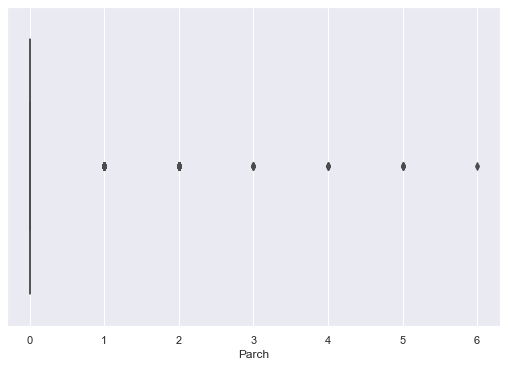

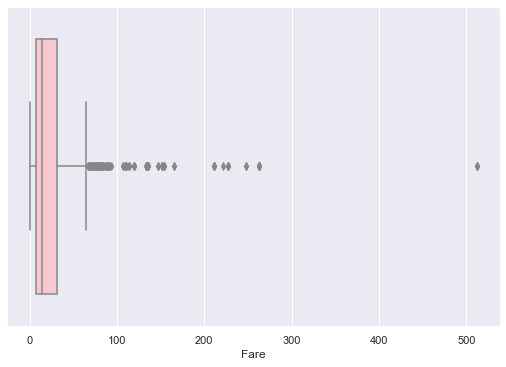

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
sns.boxplot(x=df_train.Survived,color='red')

plt.figure(figsize=(30,20))
plt.subplot(3,3,2)
sns.boxplot(x=df_train.Pclass,color='green')

plt.figure(figsize=(30,20))
plt.subplot(3,3,3)
sns.boxplot(x=df_train.Age,color='Yellow')

plt.figure(figsize=(30,20))
plt.subplot(3,3,4)
sns.boxplot(x=df_train.SibSp,color='blue')

plt.figure(figsize=(30,20))
plt.subplot(3,3,5)
sns.boxplot(x=df_train.Parch,color='orange')

plt.figure(figsize=(30,20))
plt.subplot(3,3,5)
sns.boxplot(x=df_train.Fare,color='pink')

In [15]:
All the statistics seems reasonable.
Age column: data looks representative of the true age distribution of the adult population with (29) mean.
SibSp column: very few people had siblings/spouse more than one. 75% of the people had one or no siblings/spouse
                 with them aboarded.
Parch column: most of the people had zero parent child relation who were on the ship.

SyntaxError: invalid syntax (<ipython-input-15-5f5078f7181f>, line 1)

In [16]:
df_train = df_train[df_train['Age'].between(1,60)]

In [17]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,685.0,448.000000,259.355048,1.0,221.00,442.0000,679.0,891.0000
Survived,685.0,0.405839,0.491413,0.0,0.00,0.0000,1.0,1.0000
Pclass,685.0,2.256934,0.831383,1.0,2.00,3.0000,3.0,3.0000
Age,685.0,28.828467,12.938739,1.0,20.00,28.0000,37.0,60.0000
SibSp,685.0,0.519708,0.940468,0.0,0.00,0.0000,1.0,5.0000
Parch,685.0,0.427737,0.851274,0.0,0.00,0.0000,1.0,6.0000
Fare,685.0,34.453844,52.941779,0.0,8.05,15.2458,33.0,512.3292


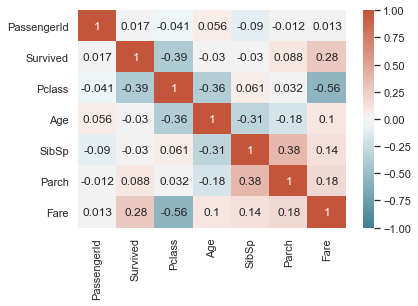

In [18]:
corr=df_train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),fmt='.2g', vmin=-1, vmax=1, center=0)

In [19]:
We can see that the variables are mostly independent from each other.

SyntaxError: invalid syntax (<ipython-input-19-380cc24533eb>, line 1)

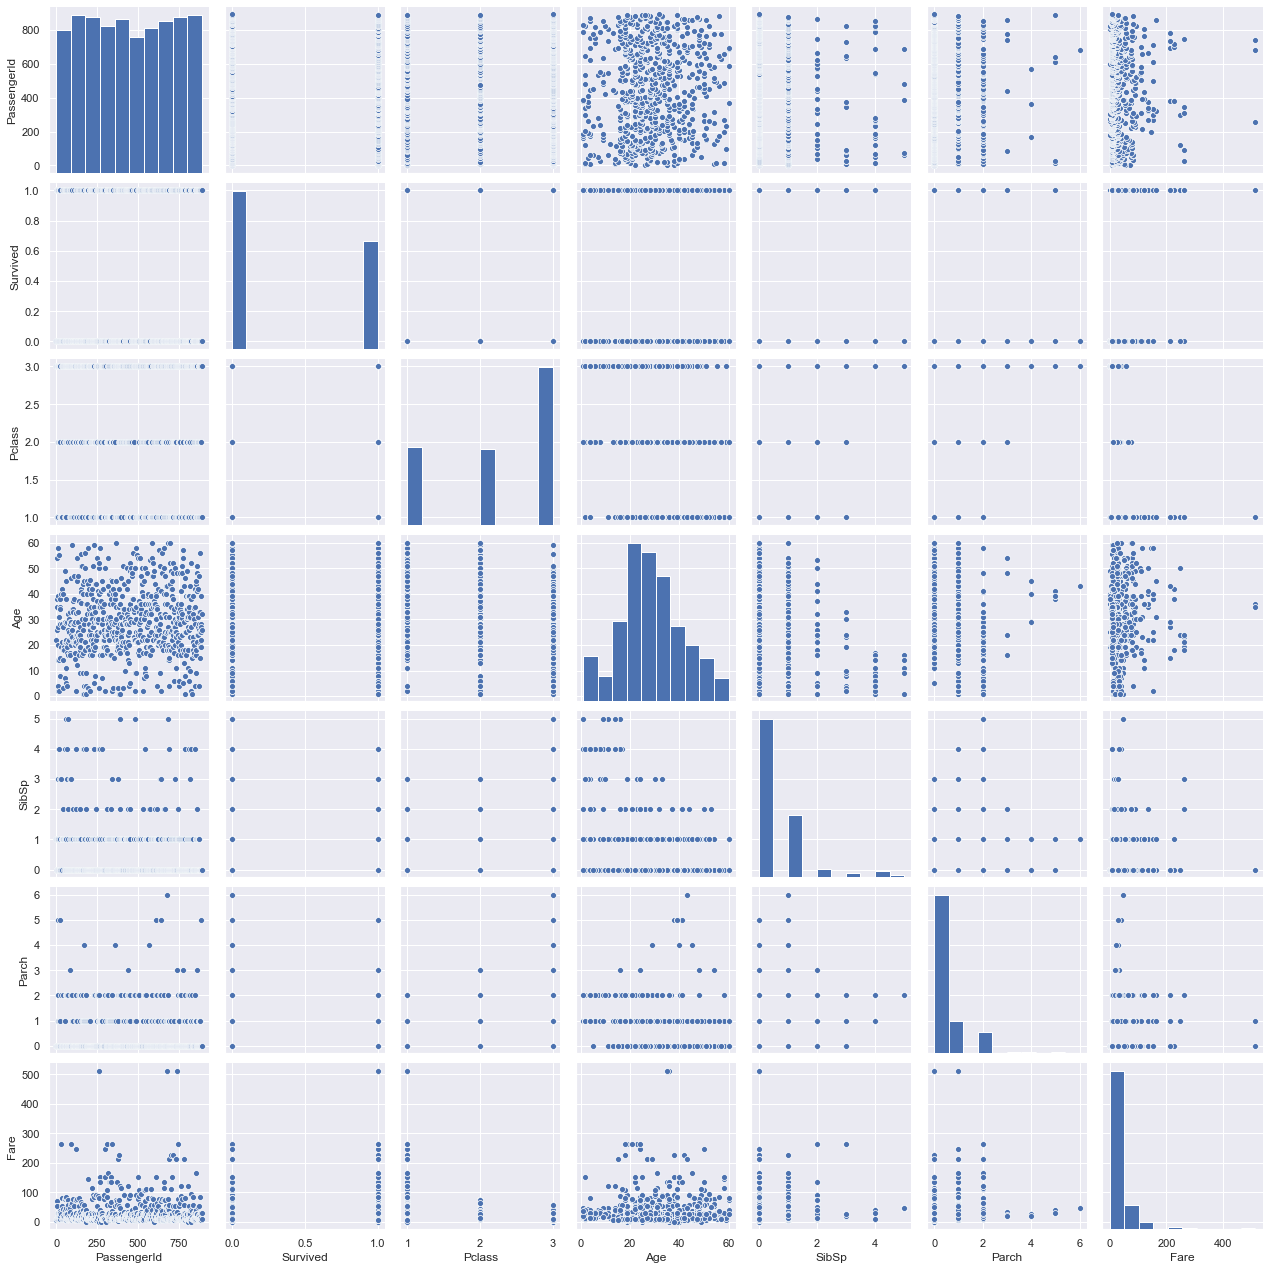

In [20]:
sns.pairplot(df_train)

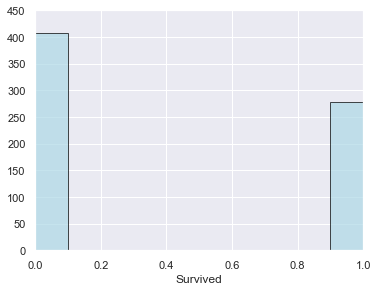

In [23]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df_train.Survived, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Survived')
plt.axis([0,1,0,450])
plt.xlim([0,1])
plt.show()